# Dependency Parsing

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/dependency](https://github.com/huseinzol05/Malaya/tree/master/example/dependency).
    
</div>

<div class="alert alert-warning">

This module only trained on standard language structure, so it is not save to use it for local language structure.
    
</div>

In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
%%time
import malaya

/home/husein/.local/lib/python3.8/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


/home/husein/.local/lib/python3.8/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32
CPU times: user 2.85 s, sys: 3.65 s, total: 6.5 s
Wall time: 2.11 s


/home/husein/dev/malaya/malaya/tokenizer.py:214: FutureWarning: Possible nested set at position 3397
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))
/home/husein/dev/malaya/malaya/tokenizer.py:214: FutureWarning: Possible nested set at position 3927
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))


### Describe supported dependencies

In [3]:
malaya.dependency.describe

[{'Tag': 'acl', 'Description': 'clausal modifier of noun'},
 {'Tag': 'advcl', 'Description': 'adverbial clause modifier'},
 {'Tag': 'advmod', 'Description': 'adverbial modifier'},
 {'Tag': 'amod', 'Description': 'adjectival modifier'},
 {'Tag': 'appos', 'Description': 'appositional modifier'},
 {'Tag': 'aux', 'Description': 'auxiliary'},
 {'Tag': 'case', 'Description': 'case marking'},
 {'Tag': 'ccomp', 'Description': 'clausal complement'},
 {'Tag': 'compound', 'Description': 'compound'},
 {'Tag': 'compound:plur', 'Description': 'plural compound'},
 {'Tag': 'conj', 'Description': 'conjunct'},
 {'Tag': 'cop', 'Description': 'cop'},
 {'Tag': 'csubj', 'Description': 'clausal subject'},
 {'Tag': 'dep', 'Description': 'dependent'},
 {'Tag': 'det', 'Description': 'determiner'},
 {'Tag': 'fixed', 'Description': 'multi-word expression'},
 {'Tag': 'flat', 'Description': 'name'},
 {'Tag': 'iobj', 'Description': 'indirect object'},
 {'Tag': 'mark', 'Description': 'marker'},
 {'Tag': 'nmod', 'Desc

### List available HuggingFace Dependency models

In [4]:
malaya.dependency.available_huggingface

{'mesolitica/finetune-dependency-t5-tiny-standard-bahasa-cased': {'Size (MB)': 143,
  'Arc Accuracy': 0.8506069089930276,
  'Types Accuracy': 0.7831641780774206,
  'Root Accuracy': 0.8723021582733813},
 'mesolitica/finetune-dependency-t5-small-standard-bahasa-cased': {'Size (MB)': 247,
  'Arc Accuracy': 0.8494045261191319,
  'Types Accuracy': 0.783103051811978,
  'Root Accuracy': 0.8669064748201439},
 'mesolitica/finetune-dependency-t5-base-standard-bahasa-cased': {'Size (MB)': 898,
  'Arc Accuracy': 0.8528921010932324,
  'Types Accuracy': 0.7840908663367674,
  'Root Accuracy': 0.8597122302158273}}

### Load HuggingFace dependency model

```python
def huggingface(
    model: str = 'mesolitica/finetune-dependency-t5-small-standard-bahasa-cased',
    force_check: bool = True,
    **kwargs,
):
    """
    Load HuggingFace model to dependency parsing.

    Parameters
    ----------
    model: str, optional (default='mesolitica/finetune-dependency-t5-small-standard-bahasa-cased')
        Check available models at `malaya.dependency.available_huggingface()`.
    force_check: bool, optional (default=True)
        Force check model one of malaya model.
        Set to False if you have your own huggingface model.

    Returns
    -------
    result: malaya.torch_model.huggingface.Dependency
    """
```

In [5]:
model = malaya.dependency.huggingface()

`malaya.dependency.huggingface` trained on indonesian dataset and augmented dataset, not an actual malay dataset.


Loading the tokenizer from the `special_tokens_map.json` and the `added_tokens.json` will be removed in `transformers 5`,  it is kept for forward compatibility, but it is recommended to update your `tokenizer_config.json` by uploading it again. You will see the new `added_tokens_decoder` attribute that will store the relevant information.
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


### Predict

```python
def predict(
    self,
    string: str,
    validate_tree: bool = False,
    f_tree: Callable = eisner,
):
    """
    Tag a string. We assumed the string input been properly tokenized.

    Parameters
    ----------
    string: str
    validate_tree: bool, optional (default=False)
        validate arcs is a valid tree using `malaya.parser.conll.CoNLL.istree`.
        Originally from https://github.com/Unipisa/diaparser
    f_tree: Callable, optional (default=malaya.parser.alg.eisner)
        if arcs is not a tree, use approximate function to fix arcs.
        Originally from https://github.com/Unipisa/diaparser

    Returns
    -------
    result: Tuple
    """
```

In [6]:
string = 'Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar sekiranya mengantuk ketika memandu.'

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


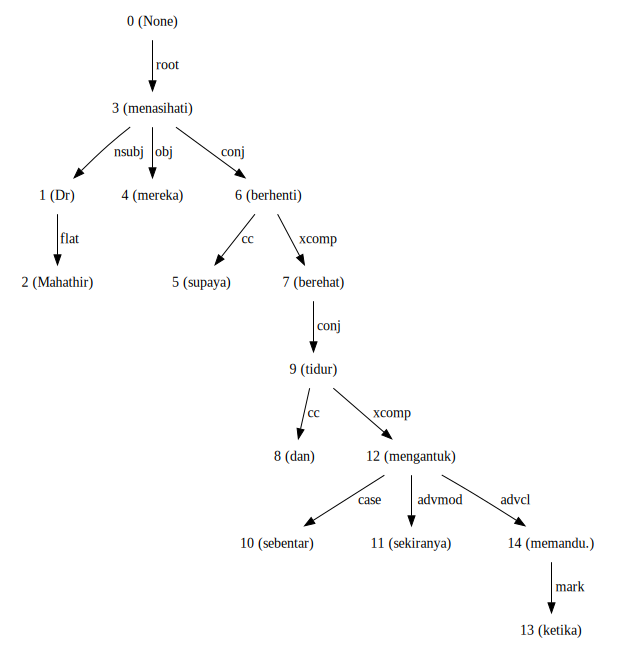

In [7]:
d_object, tagging, indexing = model.predict(string)
d_object.to_graphvis()

### Harder example

In [8]:
# https://www.astroawani.com/berita-malaysia/terbaik-tun-kita-geng-najib-razak-puji-tun-m-297884

s = """
KUALA LUMPUR: Dalam hal politik, jarang sekali untuk melihat dua figura ini - bekas Perdana Menteri, Datuk Seri Najib Razak dan Tun Dr Mahathir Mohamad mempunyai 'pandangan yang sama' atau sekapal. Namun, situasi itu berbeza apabila melibatkan isu ketidakpatuhan terhadap prosedur operasi standard (SOP). Najib, yang juga Ahli Parlimen Pekan memuji sikap Ahli Parlimen Langkawi itu yang mengaku bersalah selepas melanggar SOP kerana tidak mengambil suhu badan ketika masuk ke sebuah surau di Langkawi pada Sabtu lalu.
"""

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


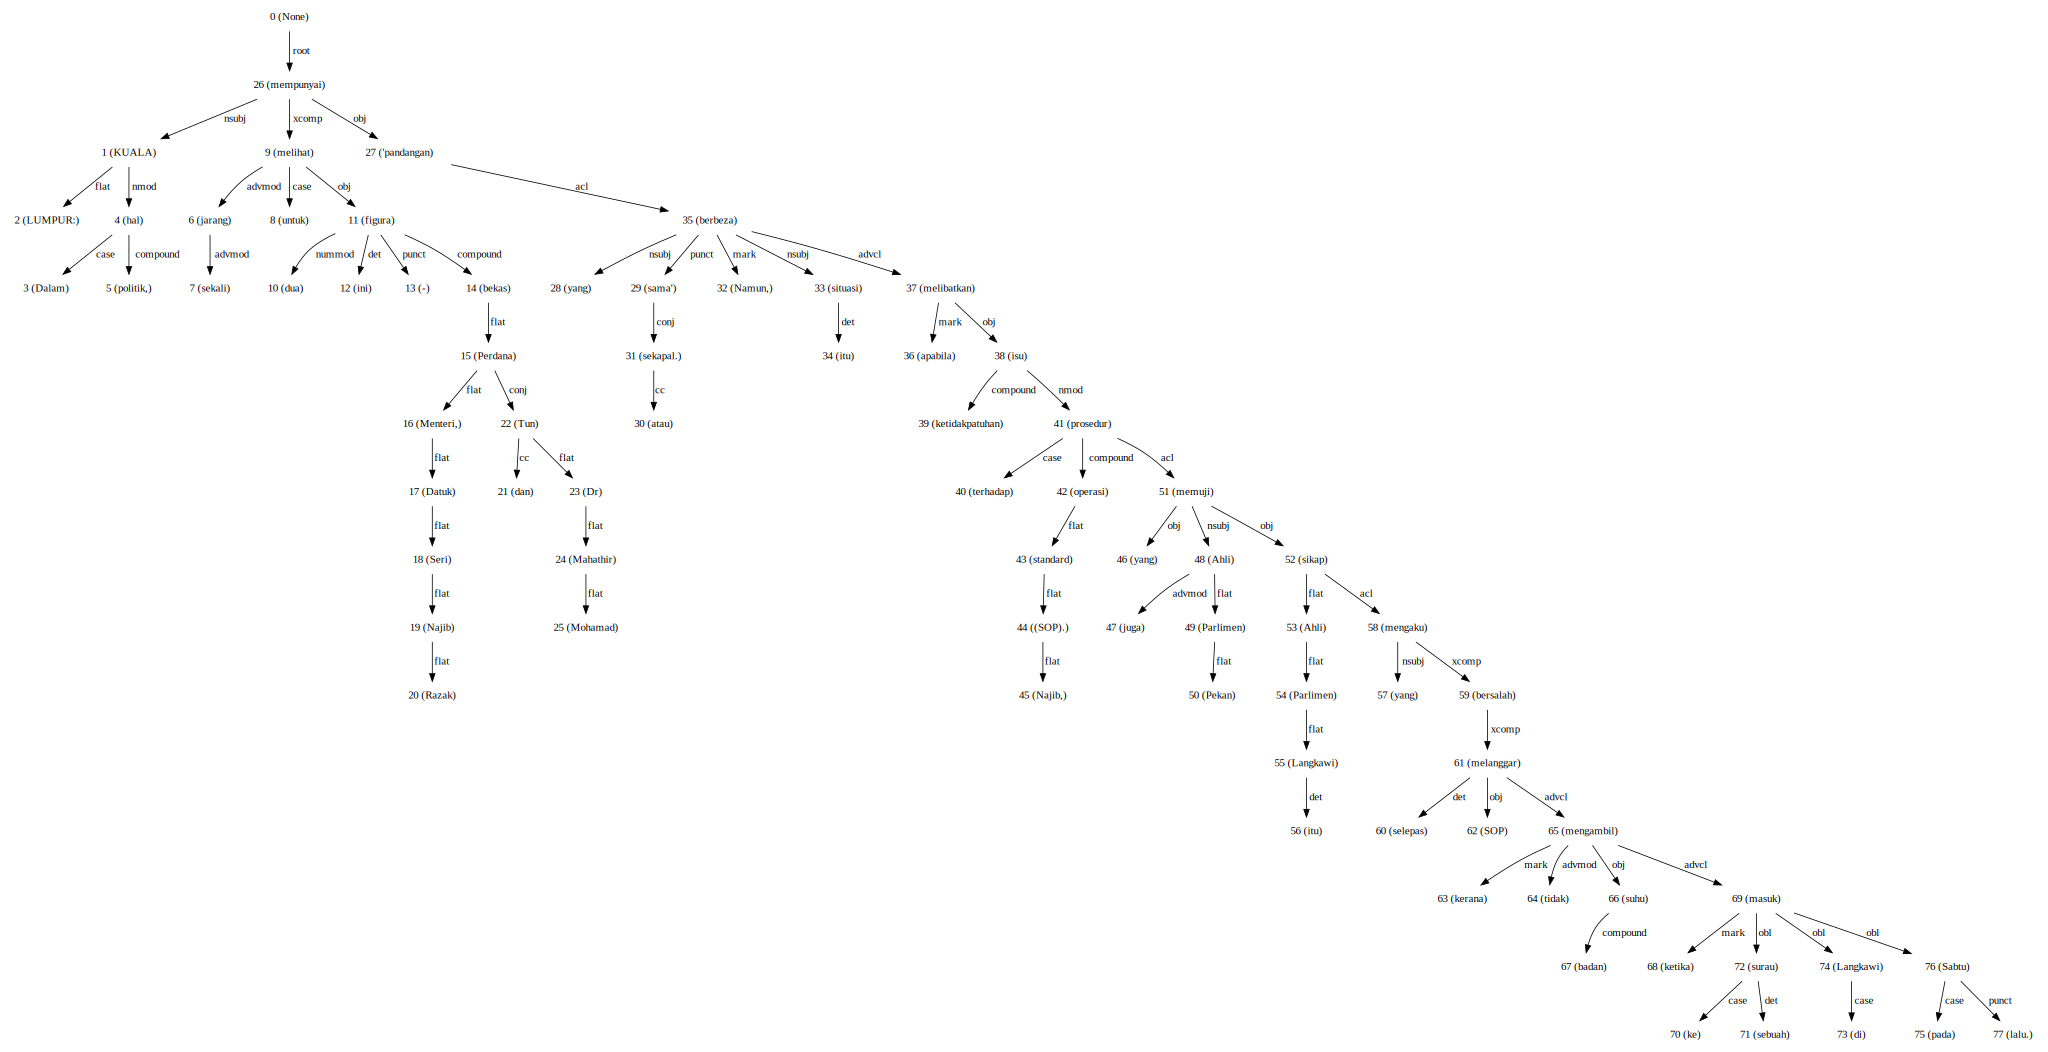

In [9]:
d_object, tagging, indexing = model.predict(s)
d_object.to_graphvis()

### Dependency graph object

To initiate a dependency graph from dependency models, you need to call `malaya.dependency.dependency_graph`.

In [10]:
graph = malaya.dependency.dependency_graph(tagging, indexing)
graph

#### generate graphvis

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


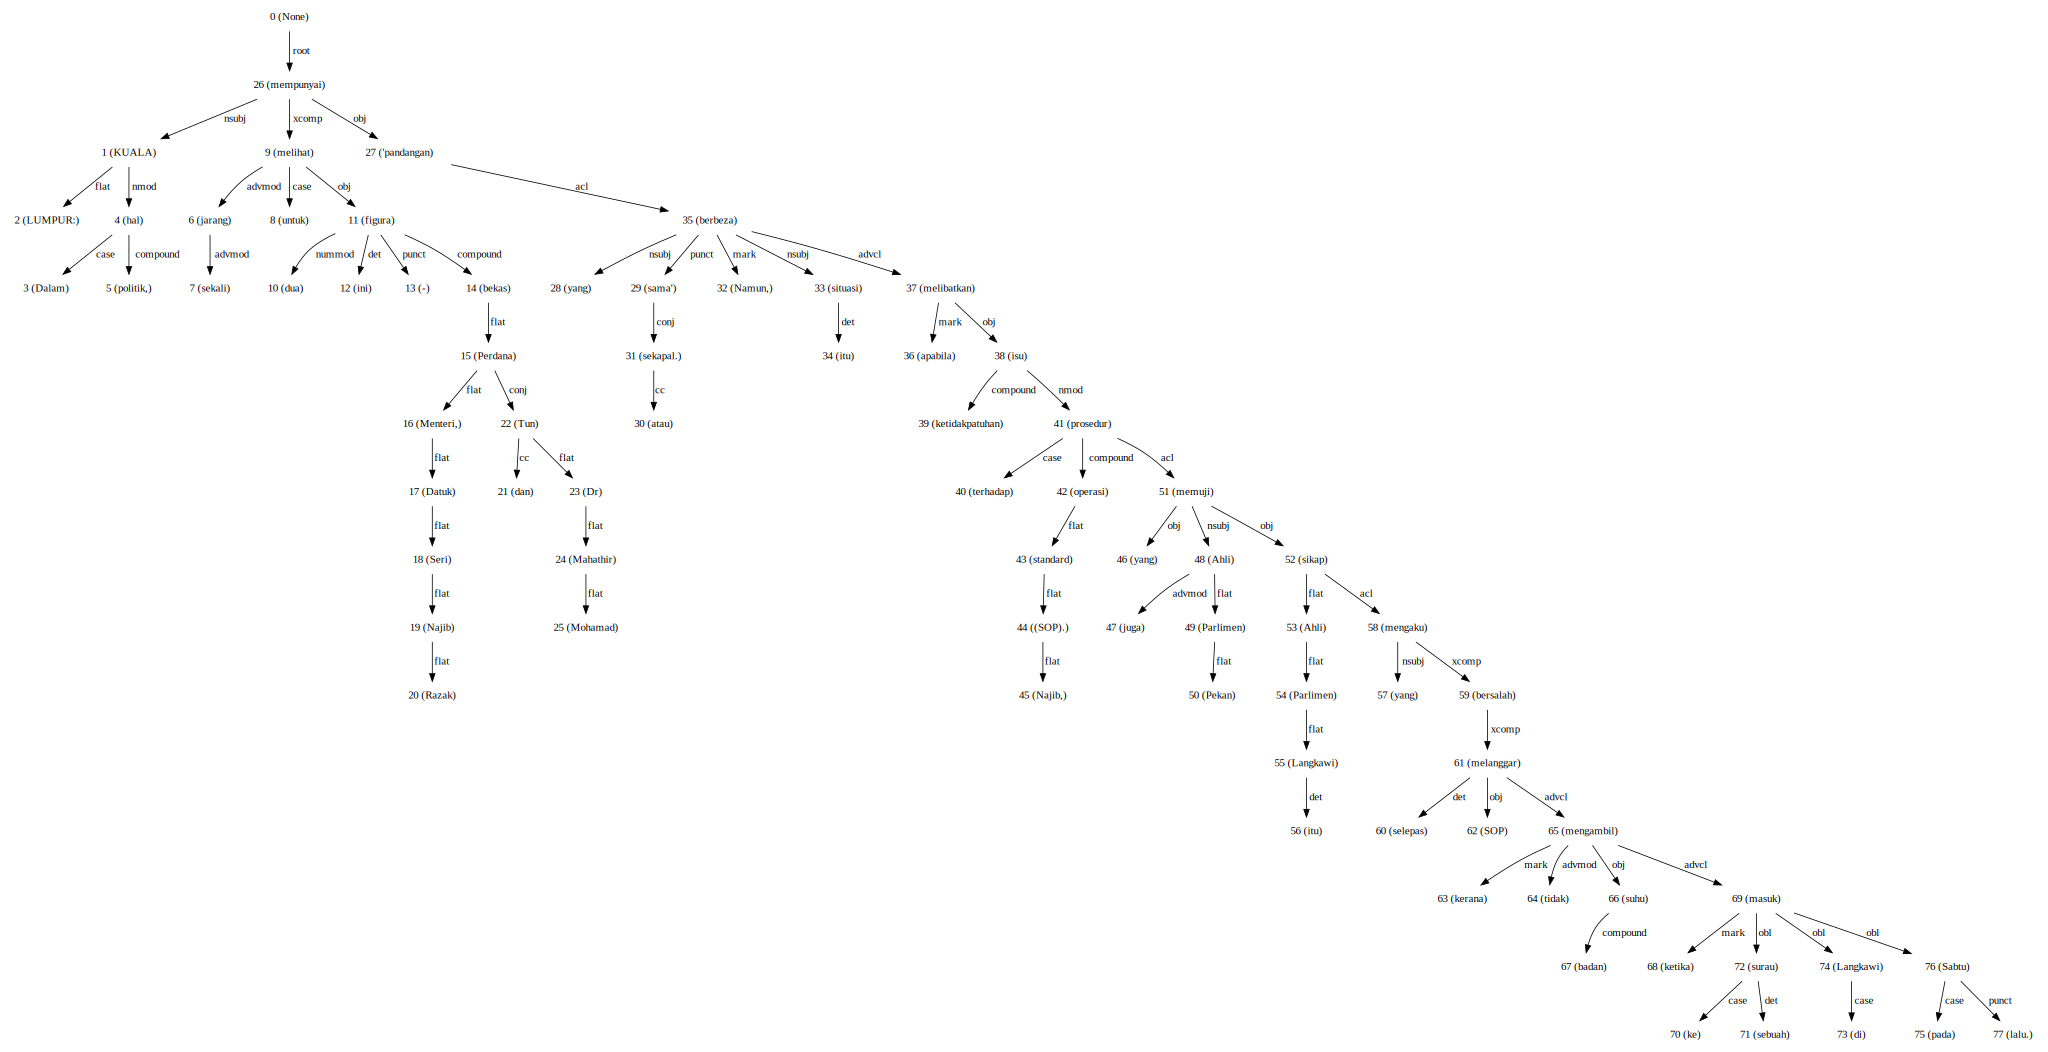

In [11]:
graph.to_graphvis()

#### Get nodes

In [12]:
graph.nodes

defaultdict(<function malaya.function.parse_dependency.DependencyGraph.__init__.<locals>.<lambda>()>,
            {0: {'address': 0,
              'word': None,
              'lemma': None,
              'ctag': 'TOP',
              'tag': 'TOP',
              'feats': None,
              'head': None,
              'deps': defaultdict(list, {'root': [26]}),
              'rel': None},
             1: {'address': 1,
              'word': 'KUALA',
              'lemma': '_',
              'ctag': '_',
              'tag': '_',
              'feats': '_',
              'head': 26,
              'deps': defaultdict(list, {'flat': [2], 'nmod': [4]}),
              'rel': 'nsubj'},
             26: {'address': 26,
              'word': 'mempunyai',
              'lemma': '_',
              'ctag': '_',
              'tag': '_',
              'feats': '_',
              'head': 0,
              'deps': defaultdict(list,
                          {'nsubj': [1], 'xcomp': [9], 'obj': [27]}),
  

#### Flat the graph

In [13]:
list(graph.triples())

[(('mempunyai', '_'), 'nsubj', ('KUALA', '_')),
 (('KUALA', '_'), 'flat', ('LUMPUR:', '_')),
 (('KUALA', '_'), 'nmod', ('hal', '_')),
 (('hal', '_'), 'case', ('Dalam', '_')),
 (('hal', '_'), 'compound', ('politik,', '_')),
 (('mempunyai', '_'), 'xcomp', ('melihat', '_')),
 (('melihat', '_'), 'advmod', ('jarang', '_')),
 (('jarang', '_'), 'advmod', ('sekali', '_')),
 (('melihat', '_'), 'case', ('untuk', '_')),
 (('melihat', '_'), 'obj', ('figura', '_')),
 (('figura', '_'), 'nummod', ('dua', '_')),
 (('figura', '_'), 'det', ('ini', '_')),
 (('figura', '_'), 'punct', ('-', '_')),
 (('figura', '_'), 'compound', ('bekas', '_')),
 (('bekas', '_'), 'flat', ('Perdana', '_')),
 (('Perdana', '_'), 'flat', ('Menteri,', '_')),
 (('Menteri,', '_'), 'flat', ('Datuk', '_')),
 (('Datuk', '_'), 'flat', ('Seri', '_')),
 (('Seri', '_'), 'flat', ('Najib', '_')),
 (('Najib', '_'), 'flat', ('Razak', '_')),
 (('Perdana', '_'), 'conj', ('Tun', '_')),
 (('Tun', '_'), 'cc', ('dan', '_')),
 (('Tun', '_'), 'flat'

#### Check the graph contains cycles

In [14]:
graph.contains_cycle()

False